# This notebook is used for data analyses
### The cell below has all helper functions

In [43]:
import json
import matplotlib.pyplot as plt
import os


def get_data(algorithm_name, loss_rate, application_type):
    FOLDER_NAME = "../data"
    assert algorithm_name in ["BBR", "Cubic"], 'Algorithm name must be either "BBR" or "Cubic"'
    assert loss_rate in [0, 0.01, 0.005], 'Loss rate must be 0, 0.01, or 0.005'
    assert application_type in ["BulkTraffic", "WebApp"], 'Application type must be either "BulkTraffic" or "WebApp"'
    filename =  f'{algorithm_name}_{loss_rate}_{application_type}.json'
    filename = f'{FOLDER_NAME}/{filename}'
    assert os.path.exists(filename), f'File {filename} does not exist'
    
    data = json.loads(open(filename).read())
    assert data is not None and isinstance(data, dict), 'Data must be a non-empty dictionary (since thats how json.loads works)'
    return data

### The cell below has a "single plot" functions

In [ ]:
def graph_throughput_over_time(algorithm_name, loss_rate, application_type):
    # 1. Load Data
    data = get_data(algorithm_name, loss_rate, application_type)

    # 2. Extract and plot throughput
    time = [interval['sum']['start'] for interval in data['intervals']]
    throughput = [interval['sum']['bits_per_second'] for interval in data['intervals']]

    # 3. Change from bytes per second to Gigabits per second
    throughput = [throughput[i] / 1e9 for i in range(len(throughput))]

    plt.plot(time, throughput, label=f'Throughput ({algorithm_name}, {loss_rate}, {application_type})')
    plt.xlabel('Time (s)')
    plt.ylabel('Throughput (Gbps)')
    plt.legend()
    plt.show()

def graph_window_size_over_time(algorithm_name, loss_rate, application_type):
    # 1. Load Data
    data = get_data(algorithm_name, loss_rate, application_type)

    # 2. Extract and plot throughput
    time = [interval['sum']['start'] for interval in data['intervals']]

    # assert that each interval streams list has only one element (i.e. only one stream per interval)
    assert all(len(interval['streams']) == 1 for interval in data['intervals'])
    window_size = [interval['streams'][0]['snd_cwnd'] for interval in data['intervals']]
    window_size = [window_size[i] / 1e6 for i in range(len(window_size))]


    plt.plot(time, window_size, label=f'Window Size ({algorithm_name}, {loss_rate}, {application_type})')
    plt.xlabel('Time (s)')
    plt.ylabel('Window Size (MB)')
    plt.legend()


def graph_rrt_size_over_time(algorithm_name, loss_rate, application_type):
    # 1. Load Data
    data = get_data(algorithm_name, loss_rate, application_type)

    # 2. Extract and plot throughput
    time = [interval['sum']['start'] for interval in data['intervals']]

    # assert that each interval streams list has only one element (i.e. only one stream per interval)
    assert all(len(interval['streams']) == 1 for interval in data['intervals'])
    rtt = [interval['streams'][0]['rtt'] for interval in data['intervals']]

    # convert from microseconds to milliseconds
    rtt = [rtt[i] / 1e3 for i in range(len(rtt))]

    plt.plot(time, rtt, label=f'RTT ({algorithm_name}, {loss_rate}, {application_type})')
    plt.xlabel('Time (s)')
    plt.ylabel('RTT (miliseconds)')
    plt.legend()

### The cell below has all "double plot" functions 
Used to compare two algorithms

In [71]:
def graph_compare_throughput_of_two_algorithms_over_time(loss_rate, application_type, limit_x_axis_timestamp = False):
    algorithm_name1, algorithm_name2 = "BBR", "Cubic"
    # 1. Load Data
    data1 = get_data(algorithm_name1, loss_rate, application_type)
    data2 = get_data(algorithm_name2, loss_rate, application_type)

    # 2. Extract and plot throughput
    time1 = [interval['sum']['start'] for interval in data1['intervals']]
    time2 = [interval['sum']['start'] for interval in data2['intervals']]

    throughput1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
    throughput2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

    # 3. Change from bytes per second to Gigabits per second
    throughput1 = [throughput1[i] / 1e9 for i in range(len(throughput1))]
    throughput2 = [throughput2[i] / 1e9 for i in range(len(throughput2))]

    # 4. Limit x-axis 
    assert limit_x_axis_timestamp is False or isinstance(limit_x_axis_timestamp, int), 'limit_x_axis_timestamp must be an integer or False'
    if limit_x_axis_timestamp is not False:
        time1 = time1[:limit_x_axis_timestamp]
        time2 = time2[:limit_x_axis_timestamp]
        throughput1 = throughput1[:limit_x_axis_timestamp]
        throughput2 = throughput2[:limit_x_axis_timestamp]


    plt.plot(time1, throughput1, label=f'Throughput ({algorithm_name1}, {loss_rate}, {application_type})')
    plt.plot(time2, throughput2, label=f'Throughput ({algorithm_name2}, {loss_rate}, {application_type})')
    plt.xlabel('Time (s)')
    plt.ylabel('Throughput (Gbps)')
    plt.legend()
    plt.show()

def graph_compare_congestion_window_of_two_algorithms_over_time(loss_rate, application_type, limit_x_axis_timestamp = False):
    algorithm_name1, algorithm_name2 = "BBR", "Cubic"

    # 1. Load Data
    data1 = get_data(algorithm_name1, loss_rate, application_type)
    data2 = get_data(algorithm_name2, loss_rate, application_type)

    # 2. Extract and plot congestion window
    time1 = [interval['sum']['start'] for interval in data1['intervals']]
    time2 = [interval['sum']['start'] for interval in data2['intervals']]

    # assert that each interval streams list has only one element (i.e. only one stream per interval)
    assert all(len(interval['streams']) == 1 for interval in data1['intervals'])
    assert all(len(interval['streams']) == 1 for interval in data2['intervals'])

    window_size1 = [interval['streams'][0]['snd_cwnd'] for interval in data1['intervals']]
    window_size2 = [interval['streams'][0]['snd_cwnd'] for interval in data2['intervals']]

    # window_size1 = [interval['streams'][0]['snd_wnd'] for interval in data1['intervals']]
    # window_size2 = [interval['streams'][0]['snd_wnd'] for interval in data2['intervals']]

    # 3. Change from bytes per second to Gigabits per second
    window_size1 = [window_size1[i] / 1e6 for i in range(len(window_size1))]
    window_size2 = [window_size2[i] / 1e6 for i in range(len(window_size2))]


    # 4. Limit x-axis 
    assert limit_x_axis_timestamp is False or isinstance(limit_x_axis_timestamp, int), 'limit_x_axis_timestamp must be an integer or False'
    if limit_x_axis_timestamp is not False:
        time1 = time1[:limit_x_axis_timestamp]
        time2 = time2[:limit_x_axis_timestamp]
        window_size1 = window_size1[:limit_x_axis_timestamp]
        window_size2 = window_size2[:limit_x_axis_timestamp]

    plt.plot(time1, window_size1, label=f'Window Size ({algorithm_name1}, {loss_rate}, {application_type})')
    plt.plot(time2, window_size2, label=f'Window Size ({algorithm_name2}, {loss_rate}, {application_type})')
    plt.xlabel('Time (s)')
    plt.ylabel('Window Size (MB)')
    plt.legend()
    plt.show()

def graph_compare_rrt_of_two_algorithms_over_time(loss_rate, application_type, limit_x_axis_timestamp = False):
    algorithm_name1, algorithm_name2 = "BBR", "Cubic"

    # 1. Load Data
    data1 = get_data(algorithm_name1, loss_rate, application_type)
    data2 = get_data(algorithm_name2, loss_rate, application_type)

    # 2. Extract and plot rrt
    time1 = [interval['sum']['start'] for interval in data1['intervals']]
    time2 = [interval['sum']['start'] for interval in data2['intervals']]

    # assert that each interval streams list has only one element (i.e. only one stream per interval)
    assert all(len(interval['streams']) == 1 for interval in data1['intervals'])
    assert all(len(interval['streams']) == 1 for interval in data2['intervals'])
    rtt1 = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
    rtt2 = [interval['streams'][0]['rtt'] for interval in data2['intervals']]

    # 3. Change from microseconds to milliseconds
    rtt1 = [rtt1[i] / 1e3 for i in range(len(rtt1))]
    rtt2 = [rtt2[i] / 1e3 for i in range(len(rtt2))]

    # 4. Limit x-axis 
    assert limit_x_axis_timestamp is False or isinstance(limit_x_axis_timestamp, int), 'limit_x_axis_timestamp must be an integer or False'
    if limit_x_axis_timestamp is not False:
        time1 = time1[:limit_x_axis_timestamp]
        time2 = time2[:limit_x_axis_timestamp]
        rtt1 = rtt1[:limit_x_axis_timestamp]
        rtt2 = rtt2[:limit_x_axis_timestamp]

    plt.plot(time1, rtt1, label=f'RTT ({algorithm_name1}, {loss_rate}, {application_type})')
    plt.plot(time2, rtt2, label=f'RTT ({algorithm_name2}, {loss_rate}, {application_type})')
    plt.xlabel('Time (s)')
    plt.ylabel('RTT (miliseconds)')
    plt.legend()
    plt.show()



# graph_throughput_over_time(json.loads(open('../mock_data.json').read()))

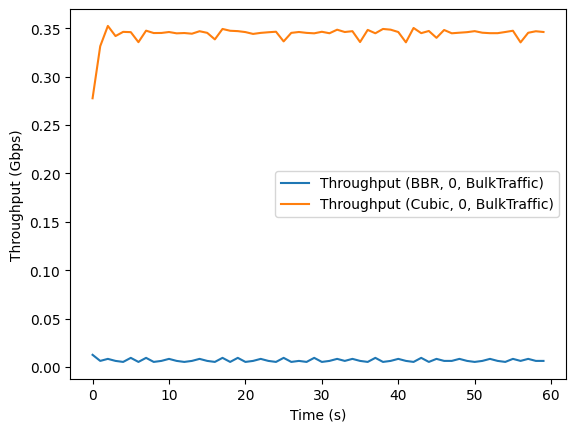

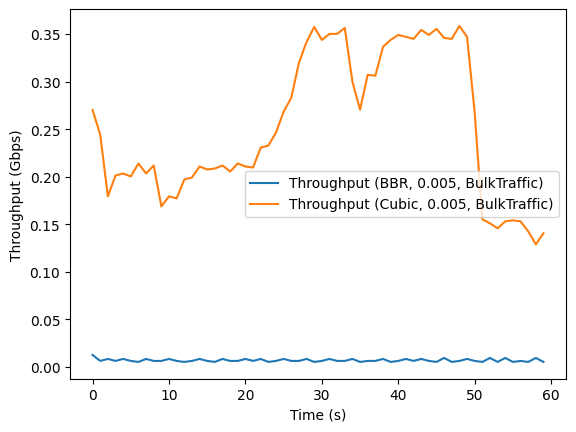

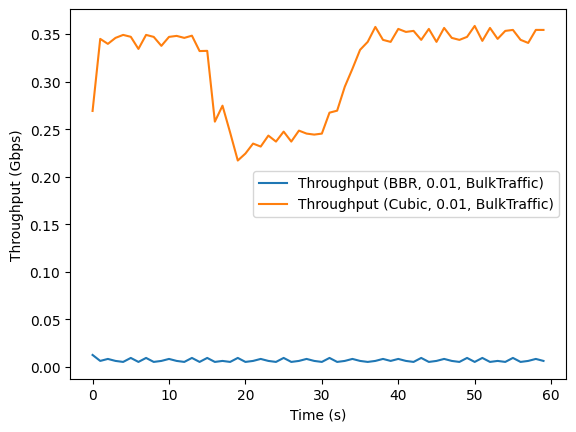

In [72]:
application_type = "BulkTraffic"
for loss_rate in [0, 0.005, 0.01]:
    graph_compare_throughput_of_two_algorithms_over_time(loss_rate, application_type, limit_x_axis_timestamp = 60)

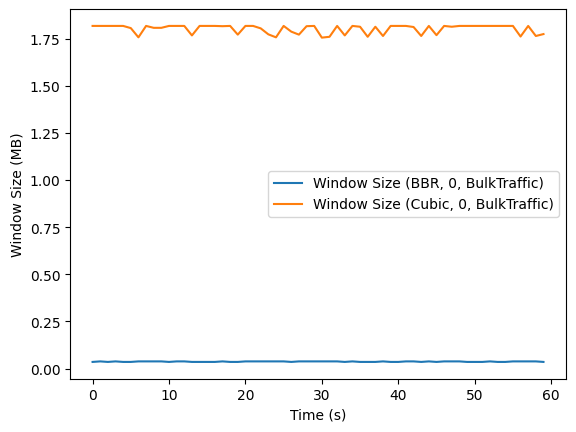

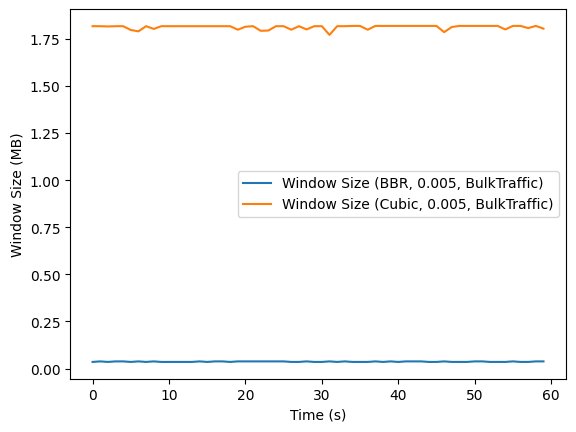

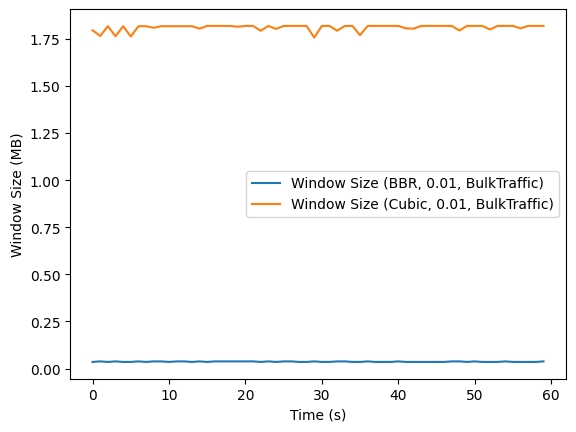

In [73]:
application_type = "BulkTraffic"
for loss_rate in [0, 0.005, 0.01]:
    graph_compare_congestion_window_of_two_algorithms_over_time(loss_rate, application_type, limit_x_axis_timestamp = 60)

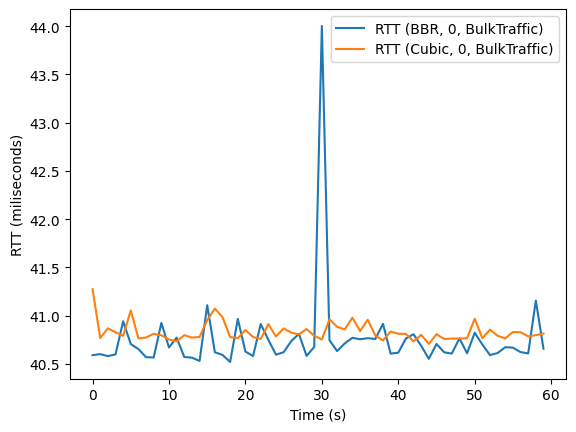

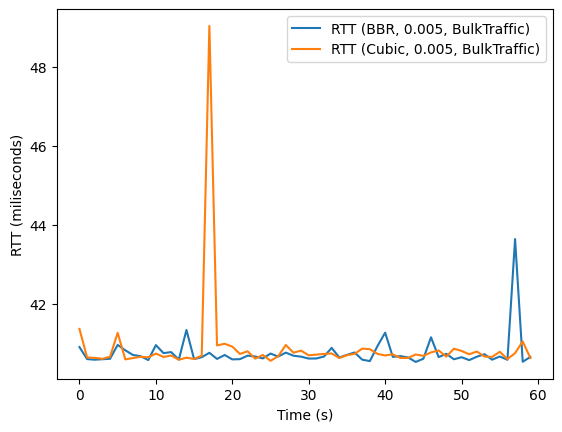

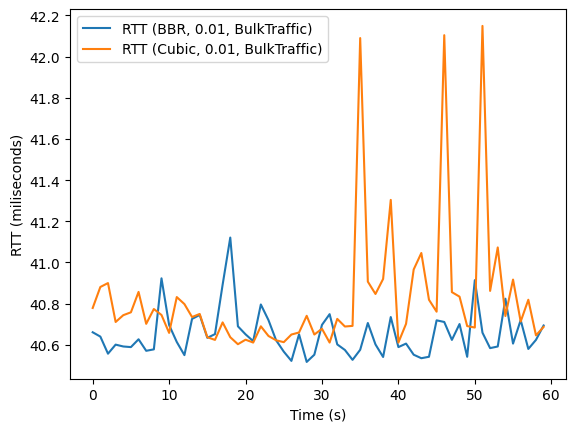

In [74]:
application_type = "BulkTraffic"
for loss_rate in [0, 0.005, 0.01]:
    graph_compare_rrt_of_two_algorithms_over_time(loss_rate, application_type, limit_x_axis_timestamp = 60)